# Multispectral Remote Sensing Imagery in Python

## Introduction to Multi-Band Raster Data

In the previous weeks, you have worked with raster data derived from lidar remote sensing
instruments. These rasters consisted of one layer or band and contained information
height values derived from lidar data. In this lesson, you will
learn how to work with rasters containing multispectral imagery data stored within
multiple bands (or layers) in `Python`.

Just like you did with single band rasters, you can use the `rasterio.open()` function to open multi band raster data in `Python`.  

* To import multi-band raster data you will use the `stack()` function.
* If your multi-band data are imagery that you wish to composite, you can use
`plotRGB()`, instead of `plot()`, to plot a 3 band raster image.

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/single-vs-multi-band-raster-data.png">
    <img src="https://www.earthdatascience.org//images/courses/earth-analytics/raster-data/single-vs-multi-band-raster-data.png" alt="A raster can contain one or more bands. You can use the
    raster function to import one single band from a single OR multi-band
    raster.">
    </a>
    <figcaption>A raster can contain one or more bands. You can use the
    raster function to import one single band from a single OR multi-band
    raster. Source: Colin Williams, NEON.</figcaption>
</figure>

## What is Multispectral Imagery?

One type of multispectral imagery that is familiar to many of us is a color
image. A color image consists of three bands: red, green, and blue. Each
band represents light reflected from the red, green or blue portions of the
electromagnetic spectrum. The pixel brightness for each band, when composited
creates the colors that you see in an image. These colors are the ones your eyes
can see within the visible portion of the electromagnetic spectrum.

<figure>
    <a href="https://www.earthdatascience.org//images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg">
    <img src="https://www.earthdatascience.org//images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg" alt="A color image consists of 3 bands - red, green and blue. When
    rendered together in a GIS, or even a tool like Photoshop or any other
    image software, the 3 bands create a color image."></a>
    <figcaption>A color image consists of 3 bands - red, green and blue. When
    rendered together in a GIS, or even a tool like Photoshop or any other
    image software, the 3 bands create a color image.
	Source: Colin Williams, NEON.
    </figcaption>
</figure>

You can plot each band of a multi-band image individually using a grayscale
color gradient. Remember from the videos that you watched in class that the
LIGHTER colors represent a stronger reflection
in that band. DARKER colors represent a weaker reflection.


## Other Types of Multi-band Raster Data

Multi-band raster data might also contain:

1. **Time series:** the same variable, over the same area, over time.
2. **Multi or hyperspectral imagery:** image rasters that have 4 or more (multi-spectral) or more than 10-15 (hyperspectral) bands.

We will work with time series data later in the semester.

# NAIP data in Python

Now, we have learned that basic concepts associated with a multi-band raster. Next,
let's explore some spectral imagery in `Python` to better understand our study site -
which is the cold springs fire scare in Colorado near Nederland.



## About NAIP:

In this lesson, you will work with NAIP data.

>The National Agriculture Imagery Program (NAIP) acquires aerial imagery during the agricultural growing seasons in the continental U.S. A primary goal of the NAIP program is to make digital ortho photography available to governmental agencies and the public within a year of acquisition.

> NAIP is administered by the USDA's Farm Service Agency (FSA) through the Aerial Photography Field Office in Salt Lake City. This "leaf-on" imagery is used as a base layer for GIS programs in FSA's County Service Centers, and is used to maintain the Common Land Unit (CLU) boundaries. -- USDA NAIP Program

<a href="https://www.fsa.usda.gov/programs-and-services/aerial-photography/imagery-programs/naip-imagery/" target="_blank">Read more about NAIP</a>

NAIP is a great source of high resolution imagery across the United States.
NAIP imagery is often collected with just a red, green and Blue band. However,
some flights include a near infrared band which is very useful for quantifying
vegetation cover and health.

NAIP data access: The data used in this lesson were downloaded from the <a href="https://earthexplorer.usgs.gov/" target="_blank">USGS Earth explorer website. </a>

## Open NAIP Data in Python

Next, you will use NAIP imagery for the Coldsprings fire study area in
Colorado. To work with multi-band raster data you will use the `rasterio` and `geopandas`
packages. You will also use the `plot` module from the `earthpy` package for raster plotting.

Before you get started, make sure that your working directory is set.


In [1]:
import os
# This library is needed for file manipulation.
from glob import glob

import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Set working directory & get data
et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      "data"))

data1 = et.data.get_data('cs-test-naip')
data2 = et.data.get_data('cold-springs-fire')

# This is a way to adjust plot parameters throughout your notebook
# it is OPTIONAL!
mpl.rcParams['figure.figsize'] = (14, 14)
mpl.rcParams['axes.titlesize'] = 20

To begin, you will use the rasterio open function to open the multi-band NAIP image

`rio.open("path-to-tif-file-here")`

Remember that it is ideal to use a context manager to open raster data in Python.
This ensures that the data connection is properly closed. 

`with rio.open("path-here") as src:`

Where `src` can be whatever variable name you select to store the raster object.

In [2]:
naip_2015_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_2015_csf = rxr.open_rasterio(naip_2015_path, masked=True)
naip_2015_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

Above you imported a geotiff like you've done before. But this file is different. Notice the shape of the resulting numpy array. How many layers (known as bands) does it have?

In [3]:
naip_2015_csf.shape

(4, 2312, 4377)

You have two plotting o ptions h ere.  
You can use xarray default plotting which  has a nice facetted output.
Xarray  will also make raster / vector overlay  plots easier

http://xarray.pydata.org/en/stable/plotting.html

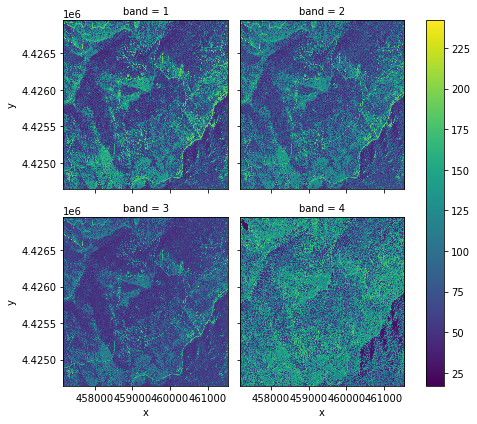

In [4]:
#  Xarray plotting
naip_2015_csf.plot.imshow(col="band",
                          col_wrap=2)
plt.show()

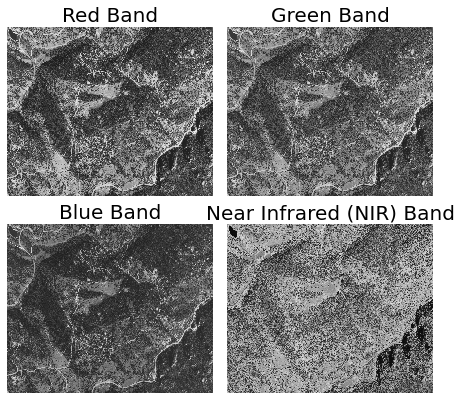

In [5]:
titles = ["Red Band",
          "Green Band",
          "Blue Band",
          "Near Infrared (NIR) Band"]

naip_ax = naip_2015_csf.plot.imshow(col="band",
                                    col_wrap=2,
                                    cmap="Greys_r",
                                    add_colorbar=False)

# Xarray produces a nicer plot but you will need to add some code to customize it
for i, ax in enumerate(naip_ax.axes.flat):
    ax.set_title(titles[i])
    ax.set_axis_off()

You can use the earthpy function `plot_bands()` to plot the data. 

Look closely at the count element in the metadata for your raster. Not that now, the count is 4 rather than 1. This is because you have multiple bands in your raster, one for each 'color' or type of light collected by the camera. For NAIP data you have red, green, blue and near infrared bands. When you worked with the lidar rasters in week 2 your count was 1 as a DSM or DTM is only composed of one band. 



### Customize your Plot: Plot Raster Band Images

Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you first explore and open your data. You will not need this for your homework but you might want to do it to explore other data that you use in your career. Earthpy contains a `plot_bands()` function that allows you to quickly plot each band individually. Similar to plotting a single band, in each band "color", the brightest pixels are lighter in color or white representing a stronger reflectance for that color on that pixel. The darkest pixels are darker to black in color representing less reflectance of that color in that pixel. 

#### Plot Bands Using Earthpy

You can use the earthpy package to plot a single or all bands in your array. 
To use earthpy call:

`ep.plot_bands()`

run `help(ep.plot_bands)` to see all of the arguments that it accepts. 
The arguments below will be useful in this demo:  

* `title`: A single title for one band or a list of x titles for x bands in your array
* `figsize`: A tuple of 2 values representing the x and y dimensions of the image.
* `cmap`: The colormap that you'd like to use to plot the raster. Default is greyscale
* `cols`: If you are plotting more than one band you can specify the number of columns in the grid that you'd like to plot. 
* `extent` : Bounding box that the data will fill: (minx, miny, maxx, maxy). Used to fix the extent when overlaying an image with vector data. 
* `cbar` : Will turn off colorbar displayed for the image.
* `scale` : Will turn off bytescale scaling. When set to false, allows a plot to not be scaled from 0-255.
* `vmin`/`vmax` : Specify the vmin or vmax to scale imshow() plots.


In [6]:
# OPTIONAL -- just in case you want to see another way to plot
# titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# # plot all bands using the earthpy function
# ep.plot_bands(naip_2015_csf,
#               title=titles,
#               figsize=(12, 5),
#               cols=2)
# plt.show()

In [7]:
naip_2015_csf.attrs

{'STATISTICS_MAXIMUM': 239,
 'STATISTICS_MEAN': nan,
 'STATISTICS_MINIMUM': 32,
 'STATISTICS_STDDEV': nan,
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'grid_mapping': 'spatial_ref'}

In [8]:
naip_2015_csf.rio.crs

CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

## Image Raster Data Values
Next, examine the raster's min and max values. What is the value range?


In [9]:
# view min and max value
print("min value: ", naip_2015_csf.min().values)
print("max value: ", naip_2015_csf.max().values)

min value:  17.0
max value:  242.0


This raster contains values between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (red, green and blue), band 1 is the red band. When we plot the red band, larger numbers (towards 255) represent pixels with more red in them (a strong red reflection). Smaller numbers (towards 0) represent pixels with less red in them (less red was reflected). To plot an RGB image, we mix red + green + blue values, using the ratio of each. The ratio of each color is determined by how much light was recorded (the reflectance value) in each band. This mixture creates one single color than inturn makes up the full color image - similar to the color image your camera phone creates.

## 8 vs 16 Bit Images

It's important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. Thus the brightest whites will be at or close to 255. The darkest values in each band will be closer to 0.

### OPTIONAL: Plot A Specific Band

You can plot a single band of your choice using numpy indexing. `naip_2015_csf[1]` will access just the second band - which is the green band when using NAIP data. 

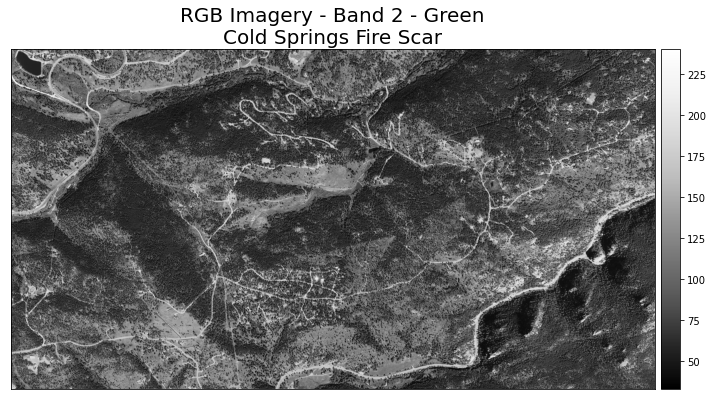

In [10]:
# Plot band 2 - green
ep.plot_bands(
    naip_2015_csf[1],
    title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
    cbar=True)
plt.show()

## Plot RGB Data in Python


Previously you have plotted individual bands using a greyscale color ramp in Python. Next, you will learn how to plot an RGB composite image. This type of image is similar in appearance to one you capture using a cell phone or digital camera. 

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/RGB-bands-raster-stack.jpg" alt="A true color image consists of 3 bands - red, green and blue.
    When composited or rendered together in a GIS, or even a image-editor like
    Photoshop the bands create a color image."></a>
    <figcaption>A "true" color image consists of 3 bands - red, green and blue.
    When composited or rendered together in a GIS, or even a image-editor like
    Photoshop the bands create a color image.
	Source: Colin Williams, NEON.
    </figcaption>
</figure>




You can use the Earthpy function called `plot_rgb()` to quickly plot 3 band composite images.
This function has several key arguments including

1. `arr`: a numpy array in rasterio band order (bands first)
2. `rgb`: the three bands that you wish to plot on the red, green and blue channels respectively
3. `title`: OPTIONAL - if you want to add a title to your plot.

Similar to plotting with geopandas, you can provide an `ax=` argument as well to plot your data on a particular matplotlib axis.


In [11]:
# f, ax = plt.subplots(figsize=(6, 4))
# naip_2015_csf.astype("uint8").sel(band=[1, 2, 3]).plot.imshow(ax=ax)
# ax.set(title="RGB NAIP Data")
# ax.set_axis_off()
# plt.show()

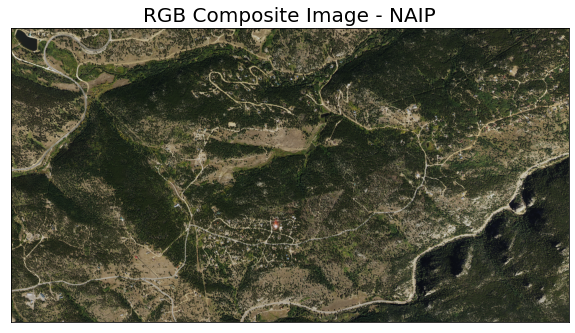

In [12]:
# For now you may find it easier to plot this way
ep.plot_rgb(naip_2015_csf.values,
            rgb=[0, 1, 2],
            title="RGB Composite Image - NAIP")
plt.show()

Optionally, you can also provide the bands that you wish to plot, the title, the figure size, and other arguements to make the plot look how you want it to look.



## CIR Image

If the image has a 4th NIR band, you can create a CIR (sometimes called false color)
image. In a color infrared image, the NIR band is plotted on the "red" band. Thus vegetation, which reflects strongly in the NIR part of the spectrum, is colored "red". CIR images are often used to better understand vegetation cover and health in an area.

HELPFUL BAND INFOSHEET PDF: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=2ahUKEwjukLq_tN7nAhWHqp4KHUnUDvMQFjAEegQIARAB&url=https%3A%2F%2Fwww.fsa.usda.gov%2FAssets%2FUSDA-FSA-Public%2Fusdafiles%2FAPFO%2Fsupport-documents%2Fpdfs%2Ffourband_infosheet_2017.pdf&usg=AOvVaw0lwlyEVpeWxJTw5aIPgoZA 

> Conversely, a CIR image is usually set up to display the infrared band data with a red tone. Red wavelengths will appear green, and green wavelengths will appear blue. Blue wavelengths are not displayed. Because healthy green vegetation will appear to be bright red, a CIR image is also known as a “false color” image.

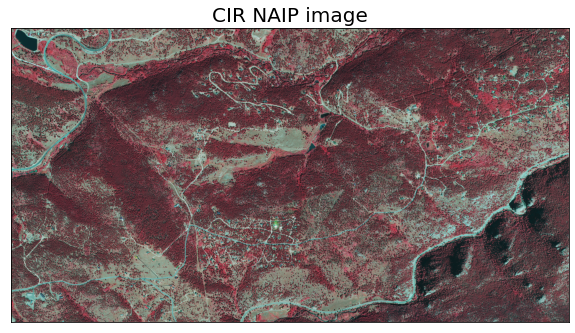

In [13]:
ep.plot_rgb(naip_2015_csf.values,
            title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

<div class="notice--warning" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge: Making Sense of Single Band Images

Plot all of the bands in the NAIP image using python, following the code examples above. Compare grayscale plots of band 1 (red), band 2 (green) and band 4 (near infrared). Is the forested area darker or lighter in band 2 (the green band) compared to band 1 (the red band)?

</div>

<!-- We'd expect a *brighter* value for the forest in band 2 (green) than in band 1 (red) because the leaves on trees of most often appear "green" -
healthy leaves reflect MORE green light compared to red light however the brightest values should be in the NIR band.-->



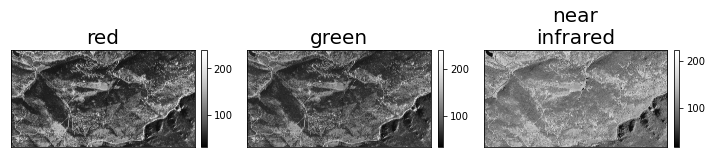

In [14]:
# TODO: Create a plot of three bands
titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_2015_csf[[0, 1, 3]],
              figsize=(10,  5),
              title=titles)
plt.show()

## Data Cleanup: Image Stretch To Increase Contrast

The image above looks pretty good. You can explore whether applying a stretch to
the image improves clarity and contrast.

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg" alt="When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg" alt="When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark. 

In the example below you only stretch bands 0,1 and 2 which are the RGB bands. To begin you

1. preallocate and array of zeros that is the same shape as your numpy array
2. then you look through each band in the image and rescale it

<i class="fa fa-star"></i> **Data Tip:** Read more about image stretch on the <a href="http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html" target = "_blank">scikit-image website</a>.
{: .notice--success }

For convenience there is stretch argument in `earthpy.plot_rgb`.

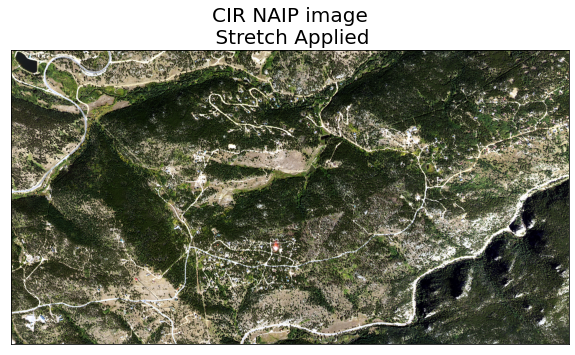

In [15]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_2015_csf,
            rgb=band_indices,
            title="CIR NAIP image\n Stretch Applied",
            figsize=(10, 8),
            stretch=True)
plt.show()

What does the image look like using a different stretch? Any better? worse?

In this case, the stretch does increase the contrast in our image. 
However visually it may or may not be what you want to plot. 


## Data Exploration: Multiband Raster Histograms

You can use the `ep.hist()` function in earthpy to plot histograms for all bands in your raster. Hist() accepts several arguments including

* `colors=`: a list of colors to use for each histogram
* `titles=`: plot titles to use for each histogram

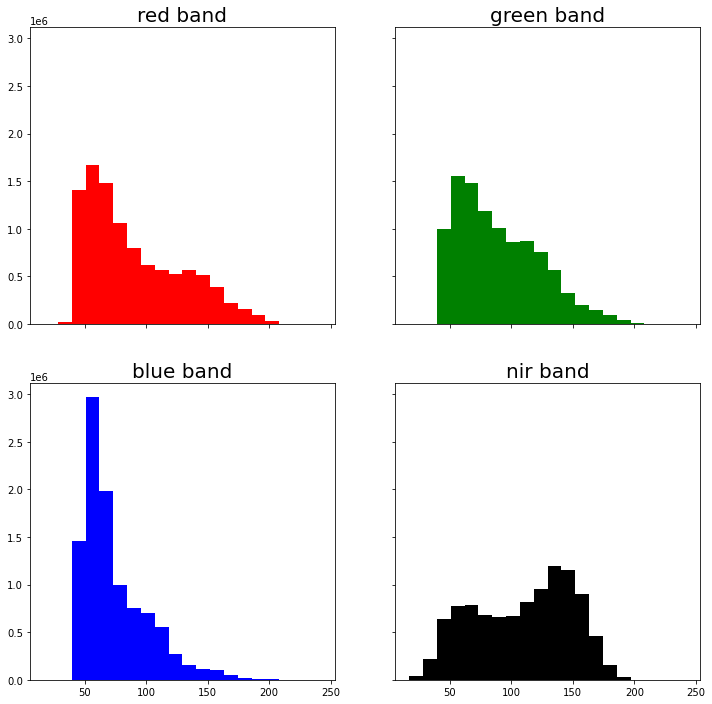

In [16]:
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'nir band']
ep.hist(naip_2015_csf.values,
        colors=colors,
        title=titles,
        cols=2)
plt.show()


# Vegetation Indices

A vegetation index is a single value that quantifies vegetation health or structure.
The math associated with calculating a vegetation index is derived from the physics
of light reflection and absorption across bands. For instance, it is known that
healthy vegetation reflects light strongly in the near infrared band and less strongly
in the visible portion of the spectrum. Thus, if you create a ratio between light
reflected in the near infrared and light reflected in the visible spectrum, it
will represent areas that potentially have healthy vegetation.


## Normalized Difference Vegetation Index (NDVI)

The Normalized Difference Vegetation Index (NDVI) is a quantitative index of
greenness ranging from 0-1 where 0 represents minimal or no greenness and 1
represents maximum greenness.

NDVI is often used for a quantitate proxy measure of vegetation health, cover
and phenology (life cycle stage) over large areas.

<figure>
 <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg">
 <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg" alt="NDVI image from NASA that shows reflectance."></a>
    <figcaption>NDVI is calculated from the visible and near-infrared light
    reflected by vegetation. Healthy vegetation (left) absorbs most of the
    visible light that hits it, and reflects a large portion of
    near-infrared light. Unhealthy or sparse vegetation (right) reflects more
    visible light and less near-infrared light. Source: NASA
    </figcaption>
</figure>

* <a href="http://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_2.php" target="_blank">
More on NDVI from NASA</a>

## Calculate NDVI in Python

Sometimes you can download already calculated NDVI data products from a data provider. 

However, in this case, you don't have a pre calculated NDVI product from NAIP data. You need to calculate NDVI using the NAIP imagery / reflectance data that you have downloaded from Earth Explorer.

### How to Derive the NDVI Vegetation Index From Multispectral Imagery

The normalized difference vegetation index (NDVI) uses a ratio between near infrared
and red light within the electromagnetic spectrum. To calculate NDVI you use the
following formula where NIR is near infrared light and
red represents red light. For your raster data, you will take the reflectance value
in the red and near infrared bands to calculate the index.

`(NIR - Red) / (NIR + Red)`

You can perform this calculation using matrix math with the `numpy` library. The `spatial` module in `earthpy` has a built in function to 
make this calculation easier that we will use in today's lesson.

Open up the NAIP data that you wish to calculate NDVI with. You will use the data from 2015 for this example that you downloaded for week 5 of this course:

`data/cold-springs-fire/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif`

In [17]:
naip_2015_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
array([[[113., 117., ...,  51.,  74.],
        [113., 117., ...,  54.,  54.],
        ...,
        [192., 192., ...,  62.,  71.],
        [193., 193., ...,  59.,  66.]],

       [[114., 114., ...,  54.,  72.],
        [114., 112., ...,  60.,  58.],
        ...,
        [184., 185., ...,  66.,  78.],
        [186., 186., ...,  58.,  65.]],

       [[ 80.,  87., ...,  54.,  63.],
        [ 79.,  83., ...,  55.,  55.],
        ...,
        [162., 164., ...,  58.,  62.],
        [165., 166., ...,  54.,  57.]],

       [[145., 143., ...,  47.,  65.],
        [145., 146., ...,  59.,  57.],
        ...,
        [170., 171., ...,  81., 105.],
        [173., 173., ...,  55.,  67.]]])
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

Calculate NDVI using the `normalized_diff()` function from the `spatial` module in `earthpy`. In this case, the bands you are subtracting come from the same data file. The tif file format requires that all layers are in the same CRS and of the same size so you assume the data line up. Thus you do not need to test the data for equal shape, crs and extent. The `normalized_diff()` function uses regular numpy array math to find the normalized difference between the two bands entered. The actual calculation being done is `(b1-b2) / (b1 + b2)`, just as shown earlier. 

In [18]:
naip_ndvi = es.normalized_diff(naip_2015_csf[3], naip_2015_csf[0])
naip_ndvi.min().values, naip_ndvi.max().values

(array(-0.64238411), array(0.54954955))

Finally plot the data. Note below that the vmin and vmax attributes are used to stretch the colorbar across the full possible range of ndvi values (-1 to 1).

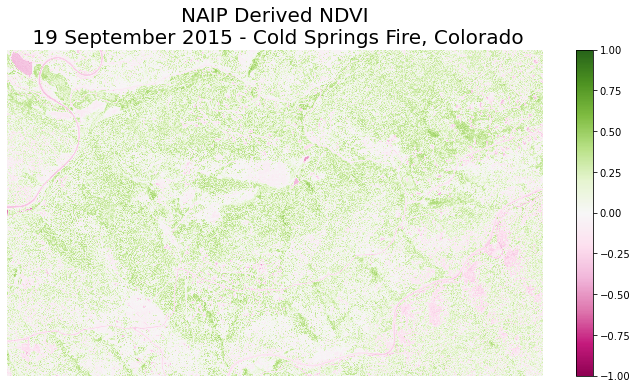

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
naip_ndvi.plot.imshow(cmap='PiYG',
                      vmin=-1,
                      vmax=1)
ax.set(title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
ax.set_axis_off()
plt.show()

In [20]:
# Plot NDVI data - using earthpy
# fig, ax = plt.subplots(figsize=(12, 6))
# ep.plot_bands(naip_ndvi,
#               cmap='PiYG',
#               vmin=-1,
#               vmax=1,
#               title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado",
#               ax=ax,
#               scale=False)
# plt.show()

### View distribution of NDVI values

Using a histogram, you can view the distribution of pixel values in your NDVI output.

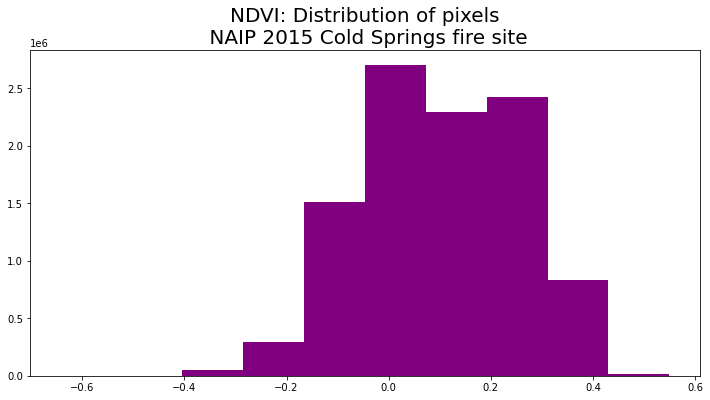

In [21]:
f, ax = plt.subplots(figsize=(12, 6))
naip_ndvi.plot.hist(ax=ax,
                    color="purple")
ax.set(title="NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site")
plt.show()

In [22]:
# earthpy option
# ep.hist(naip_ndvi.values,
#         figsize=(12, 6),
#         title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])
# plt.show()

# Overlay the Fire Boundary On Top Of Your NAIP Data

You can overlay raster and vector data to begin creating maps.


In [23]:
# Import the fire boundary
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")
fire_boundary = gpd.read_file(fire_boundary_path)

In [24]:
# Check the CRS are the same?
if naip_2015_csf.rio.crs == fire_boundary.crs:
    print("The CRS of both d atasets a re the same")
else:
    print("The CRS of both datasets are NOT the same. You will need to reproject one of the datasets")

The CRS of both datasets are NOT the same. You will need to reproject one of the datasets


In [25]:
fire_bound_utmz13 = fire_boundary.to_crs(naip_2015_csf.rio.crs)
# Check  that the CRS's are the same
# Check the CRS are the same?
if naip_2015_csf.rio.crs == fire_bound_utmz13.crs:
    print("The CRS of both datasets are the same. You're good to continue processing!")
else:
    print("The CRS of both datasets are NOT the same. You will need to reproject one of the datasets")

The CRS of both datasets are the same. You're good to continue processing!


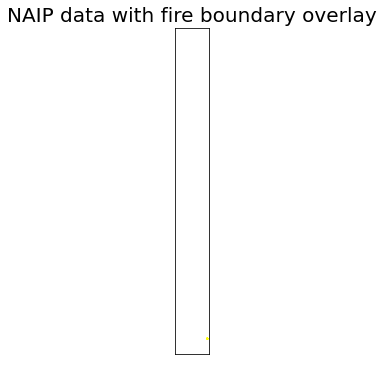

In [29]:
# Plot data using earthpy

f, ax = plt.subplots(figsize=(6, 6))

ep.plot_rgb(naip_2015_csf.values,
            rgb=[0, 1, 2],
            ax=ax)
fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='yellow',
                       linewidth=2)

ax.set_title("NAIP data with fire boundary overlay")
plt.show()

The above plot will not overlay correctly because you need a plotting extent. 

You can create a plotting extent using rasterio

Be sure to add that import to the TOP of your notebook in your homework!!

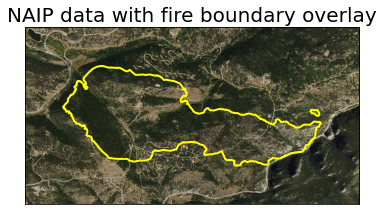

In [32]:
# Create plotting extent
from rasterio.plot import plotting_extent

naip_extent = plotting_extent(naip_2015_csf[0],
                              naip_2015_csf.rio.transform())


f, ax = plt.subplots(figsize=(6, 6))

ep.plot_rgb(naip_2015_csf.values,
            rgb=[0, 1, 2],
            extent=naip_extent,
            ax=ax)
fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='yellow',
                       linewidth=2)

ax.set_title("NAIP data with fire boundary overlay")
plt.show()

In [27]:
# An optional way to plot
# f, ax = plt.subplots(figsize=(6, 6))

# naip_2015_csf.astype("uint8").sel(band=[1, 2, 3]).plot.imshow(ax=ax)
# fire_bound_utmz13.plot(ax=ax,
#                        color='None',
#                        edgecolor='yellow',
#                        linewidth=2)
# ax.set_title("NAIP data with fire boundary overlay")
# ax.set_axis_off()
# plt.show()

## Clip one dataset to the extent of another

You can use reproject_match to clip one xarray object to the extent of another. 
You will need to do this in your homework for this week in order for the raster calculations to come out properly.

See below for an example:

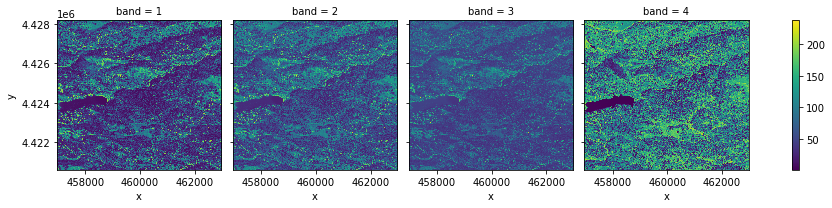

In [34]:
# This is the 2017 NAIP data if you
naip_2017_path = os.path.join("cs-test-naip",
                              "m_3910505_nw_13_1_20170902.tif")

naip_2017 = rxr.open_rasterio(naip_2017_path, masked=True)
naip_2017.plot.imshow(col="band")

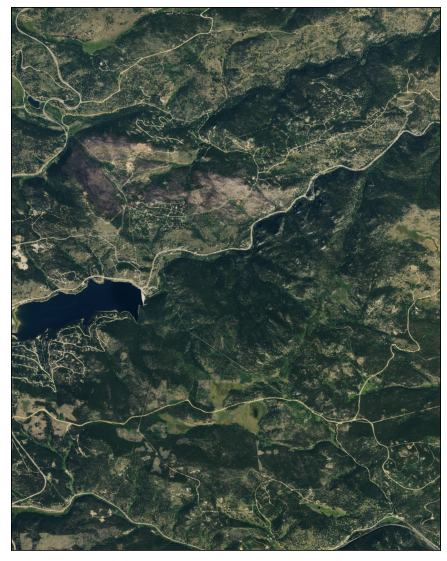

<AxesSubplot:>

In [41]:
ep.plot_rgb(naip_2017.values)

In [36]:
# clip the 2017 data to the extent of the 2015 data
naip_2017_crop = naip_2017.rio.reproject_match(naip_2015_csf)

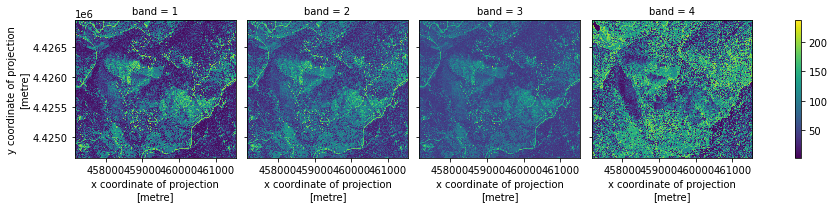

In [38]:
naip_2017_crop.plot.imshow(col="band")
plt.show()

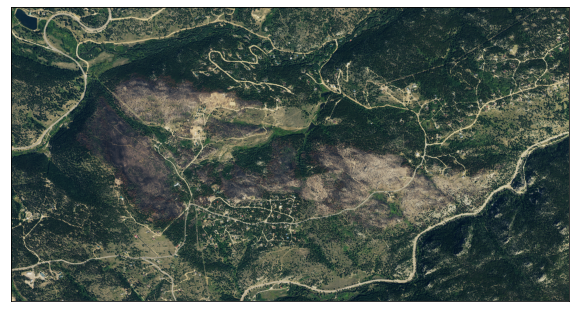

<AxesSubplot:>

In [39]:
ep.plot_rgb(naip_2017_crop.values)